In [17]:
import os
jdbcPathUbuntu = '/usr/share/java/postgresql-42.2.23.jar'
jdbcPathMacOS = '/Users/cristianomartinsm/postgresql-42.2.23.jar'
jdbcPath = jdbcPathUbuntu
os.environ['PYSPARK_SUBMIT_ARGS'] = '--driver-class-path ' + jdbcPath + ' --jars ' + jdbcPath + ' pyspark-shell'
import pandas as pd
import databricks.koalas as ks
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import json

In [18]:
rootFolder = '/home/cristiano/Dropbox/UFMG/Cristiano/Doutorado/Segunda Etapa da Qualificação/OptimizingCarsharingStationsLocation/'
folder = rootFolder + 'SASS/'

dataList = list()
for parameter in ['0', '0.5', '1', '1.5', '2', '2.5']:
    for counter in range(1, 41):
        fileName = folder + str(parameter) + '/' + str(counter) + '.json'
        with open(fileName) as jsonFile:
            optimalSolution = json.load(jsonFile)

            dataList.append((parameter, optimalSolution["SolutionInfo"]["Runtime"]))

dataFrame = ks.DataFrame(data=dataList, dtype=float)
dataList = None

             1                                                                                         \\
         count         mean       std          min          25%          50%          75%          max \\
0                                                                                                      \\
0.0  & 40.0000    & 28.6212  & 0.0847    & 28.4838    & 28.5724    & 28.6027    & 28.6370    & 28.9554 \\
2.5  & 40.0000  & 2304.2759  & 7.4962  & 2298.3011  & 2301.3499  & 2303.4058  & 2305.1011  & 2348.2902 \\
1.0  & 40.0000   & 103.4426  & 0.1401   & 103.1448   & 103.3351   & 103.4565   & 103.5344   & 103.6803 \\
0.5  & 40.0000    & 62.5565  & 1.1745    & 58.4579    & 62.7704    & 62.8842    & 62.9558    & 63.0650 \\
2.0  & 40.0000   & 491.0741  & 0.5176   & 490.0947   & 490.6449   & 491.0775   & 491.3520   & 492.6777 \\
1.5  & 40.0000   & 276.7426  & 0.2480   & 276.2869   & 276.5408   & 276.6664   & 276.8436   & 277.4649


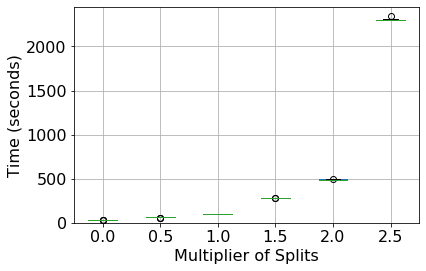

In [19]:
def formatFloat(value):
    numDecimaPlaces = 4
    return " & " + "{:.{nDigits}f}".format(value, nDigits=numDecimaPlaces)

#print(dataFrame.groupby(by=0).describe())
stringKdf = dataFrame.groupby(by=0).describe().to_string(float_format=formatFloat).replace("\n", " \\\\\n")
print(stringKdf)

dataFramePD = dataFrame.to_pandas()
ax = dataFramePD.boxplot(by=0, fontsize=16)
#ax.set_yscale('log')
fig = ax.get_figure()
fig.suptitle('')
ax.set_title('')
ax.set_xlabel("Multiplier of Splits", fontsize=16)
ax.set_ylabel("Time (seconds)", fontsize=16)
ax.set_ylim([0, 2450])
plt.savefig('SASSTimeSpentBoxplots.eps', format='eps', bbox_inches = "tight")
plt.show()

In [20]:
k2, p = stats.normaltest(dataFrame[dataFrame[0] == 2.0][1].to_numpy())
alpha = 5e-2
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.0928856
The null hypothesis cannot be rejected


In [21]:
folder = rootFolder + 'SASS/'

dataList = list()
for parameter in ['0', '0.5', '1', '1.5', '2', '2.5']:
    fileName = folder + str(parameter) + '/1.json'
    with open(fileName) as jsonFile:
        optimalSolution = json.load(jsonFile)

        dataList.append((parameter, optimalSolution["SolutionInfo"]["ObjVal"]))

fileName = rootFolder + 'SASS_1_Thread/4/1.json'
with open(fileName) as jsonFile:
    optimalSolution = json.load(jsonFile)

    dataList.append((4, optimalSolution["SolutionInfo"]["ObjVal"]))

fileName = rootFolder + 'SASS_1_Thread/9/result1.sol'
with open(fileName) as file:
    for line in file:
        if line.startswith('# Objective value = '):
            objectiveValue = line.split()[4]
            dataList.append((9, objectiveValue))

dataFrame = ks.DataFrame(data=dataList, dtype=float)
dataList = None

            1                                                                                                                    \\
        count              mean    std               min               25%               50%               75%               max \\
0                                                                                                                                \\
0.0  & 1.0000   & 93925353.8579  & nan   & 93925353.8579   & 93925353.8579   & 93925353.8579   & 93925353.8579   & 93925353.8579 \\
2.5  & 1.0000  & 164008540.8018  & nan  & 164008540.8018  & 164008540.8018  & 164008540.8018  & 164008540.8018  & 164008540.8018 \\
1.0  & 1.0000  & 135101066.9318  & nan  & 135101066.9318  & 135101066.9318  & 135101066.9318  & 135101066.9318  & 135101066.9318 \\
4.0  & 1.0000  & 176816339.1290  & nan  & 176816339.1290  & 176816339.1290  & 176816339.1290  & 176816339.1290  & 176816339.1290 \\
0.5  & 1.0000  & 114848601.1505  & nan  & 114848601.1505  & 114848601.1505  

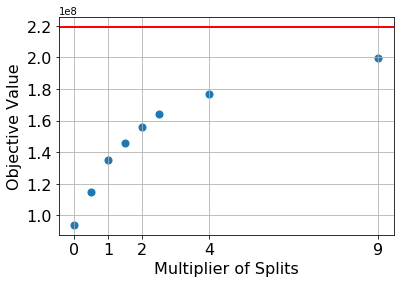

In [22]:
#print(dataFrame.groupby(by=0).describe())
stringKdf = dataFrame.groupby(by=0).describe().to_string(float_format=formatFloat).replace("\n", " \\\\\n")
print(stringKdf)

dataFramePD = dataFrame.to_pandas()
ax = dataFramePD.plot.scatter(x=0, y=1, s=50, fontsize=16, grid=True)
ax.axhline(y=2.1911529462620056e+08, color='r', lw=2)
ax.set_xlabel("Multiplier of Splits", fontsize=16)
ax.set_ylabel("Objective Value", fontsize=16)
ax.set_xticks([0, 1, 2, 4, 9])
#ax.ticklabel_format(useOffset=False, style='plain')
plt.savefig('ObjectiveValues.eps', format='eps', bbox_inches = "tight")
plt.show()

In [23]:
folder = rootFolder + 'SASS/'

dataList = list()
for parameter in ['0', '0.5', '1', '1.5', '2', '2.5', '4']:
    for counter in range(1, 41):
        if parameter is not '4':
            fileName = folder + str(parameter) + '/' + str(counter) + '.json'
        else:
            fileName = rootFolder + 'SASS_1_Thread/4/1.json'

        with open(fileName) as jsonFile:
            optimalSolution = json.load(jsonFile)

            counterSol = 0
            for varSolution in optimalSolution["Vars"]:
                if round(float(varSolution["X"])) == 1:
                    counterSol += 1

            dataList.append((parameter, counterSol))

remainingFileNames = ['SASS_1_Thread/9/result1.sol', 'SSMS_1_Thread/finalResult.sol']
for i in range(len(remainingFileNames)):
    fileName = rootFolder + remainingFileNames[i]

    with open(fileName) as file:
        counterSol = 0
        for line in file:
            if not line.startswith('#') and round(float(line.split()[1])) == 1:
                counterSol += 1
    
    if i == 0:
        dataList.append((9, counterSol))
    else:
        print(counterSol)

dataFrame = ks.DataFrame(data=dataList, dtype=float)
dataList = None

72155


                 0                                                                       \\
             count      mean       std       min       25%       50%       75%       max \\
1                                                                                        \\
50180.0  & 40.0000  & 2.0000  & 0.0000  & 2.0000  & 2.0000  & 2.0000  & 2.0000  & 2.0000 \\
57152.0  & 40.0000  & 4.0000  & 0.0000  & 4.0000  & 4.0000  & 4.0000  & 4.0000  & 4.0000 \\
34929.0  & 40.0000  & 0.5000  & 0.0000  & 0.5000  & 0.5000  & 0.5000  & 0.5000  & 0.5000 \\
46113.0  & 40.0000  & 1.5000  & 0.0000  & 1.5000  & 1.5000  & 1.5000  & 1.5000  & 1.5000 \\
26250.0  & 33.0000  & 0.0000  & 0.0000  & 0.0000  & 0.0000  & 0.0000  & 0.0000  & 0.0000 \\
64669.0   & 1.0000  & 9.0000     & nan  & 9.0000  & 9.0000  & 9.0000  & 9.0000  & 9.0000 \\
52620.0  & 40.0000  & 2.5000  & 0.0000  & 2.5000  & 2.5000  & 2.5000  & 2.5000  & 2.5000 \\
42905.0  & 40.0000  & 1.0000  & 0.0000  & 1.0000  & 1.0000  & 1.0000  & 1.0000  

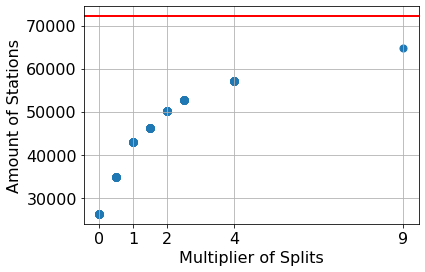

In [31]:
stringKdf = dataFrame.groupby(by=1).describe().to_string(float_format=formatFloat).replace("\n", " \\\\\n")
print(stringKdf)

dataFramePD = dataFrame.to_pandas()
ax = dataFramePD.plot.scatter(x=0, y=1, s=50, fontsize=16, grid=True)
ax.axhline(y=counterSol, color='r', lw=2)
ax.set_xlabel("Multiplier of Splits", fontsize=16)
ax.set_ylabel("Amount of Stations", fontsize=16)
ax.set_xticks([0, 1, 2, 4, 9])
#ax.ticklabel_format(useOffset=False, style='plain')
plt.savefig('AmountOfStations.eps', format='eps', bbox_inches = "tight")
plt.show()